<a href="https://colab.research.google.com/github/MuhammadAfaan/Machine-Learning_Labs/blob/main/Linear_Regresion_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing necessary libraries
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting
from sklearn.linear_model import LinearRegression  # For Linear Regression model
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.metrics import mean_squared_error, r2_score  # For evaluating the model
import seaborn as sns

In [2]:
df = pd.read_csv('student_data.csv')

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [5]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


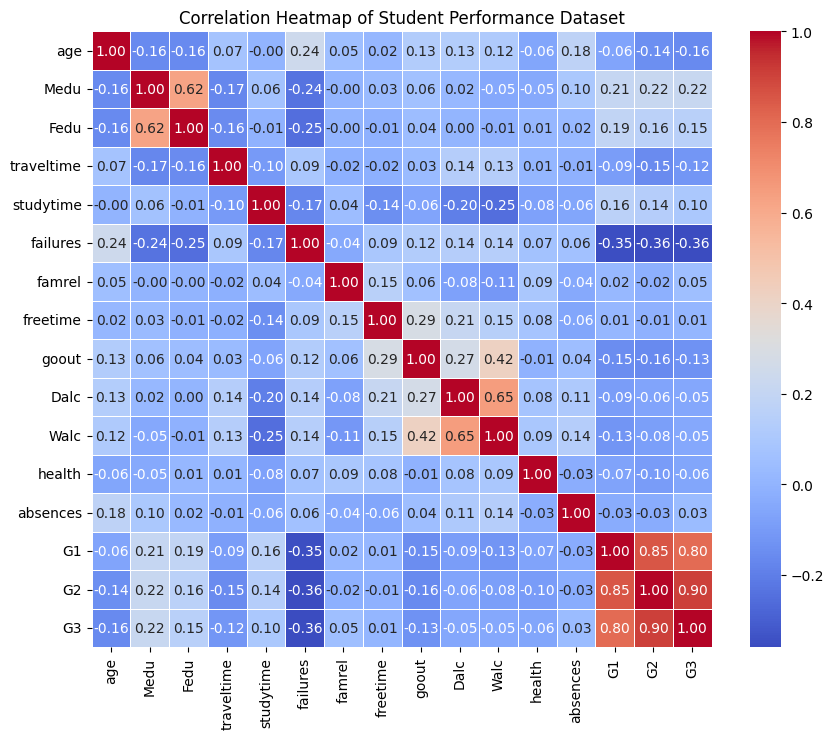

In [6]:
df_numeric = df.select_dtypes(include=[float, int])
corr_matrix = df_numeric.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Heatmap of Student Performance Dataset')
plt.show()

# **Single Linear Regression**

In [23]:
X_single = df[['G2']]
y_single = df[['G1']]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_single, y_single, test_size=0.2, random_state=42)

In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(316, 1)
(79, 1)
(316, 1)
(79, 1)


In [27]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [28]:
model.predict(X_test)

array([[ 9.04075595],
       [11.89574936],
       [ 6.8995109 ],
       [ 9.75450431],
       [ 9.75450431],
       [12.60949771],
       [16.17823947],
       [ 8.3270076 ],
       [ 9.04075595],
       [12.60949771],
       [14.03699441],
       [ 8.3270076 ],
       [13.32324606],
       [11.89574936],
       [13.32324606],
       [ 9.04075595],
       [ 8.3270076 ],
       [11.18200101],
       [14.03699441],
       [ 9.75450431],
       [13.32324606],
       [14.75074277],
       [14.03699441],
       [ 7.61325925],
       [ 9.75450431],
       [16.89198782],
       [11.18200101],
       [10.46825266],
       [15.46449112],
       [11.18200101],
       [ 9.75450431],
       [ 9.04075595],
       [14.03699441],
       [12.60949771],
       [ 8.3270076 ],
       [ 6.8995109 ],
       [ 3.33076914],
       [14.03699441],
       [11.89574936],
       [ 9.75450431],
       [ 7.61325925],
       [11.18200101],
       [13.32324606],
       [ 9.75450431],
       [14.03699441],
       [10

In [29]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 2.570691247326643
R-squared (R²): 0.8119851395189897


# **Multiple Linear Regression**

In [31]:
X = df[['failures', 'Medu', 'G2']]
y = df[['G1']]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(316, 3)
(79, 3)
(316, 1)
(79, 1)


In [39]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [40]:
model.predict(X_test)

array([[ 8.23933349],
       [11.81570985],
       [ 6.86260915],
       [ 9.83462579],
       [ 9.23026607],
       [12.58963668],
       [16.20374852],
       [ 8.37194624],
       [ 9.14587307],
       [12.7599849 ],
       [14.05231624],
       [ 8.62746857],
       [13.36356352],
       [11.98605807],
       [13.27838941],
       [ 9.14587307],
       [ 8.45712035],
       [11.12695713],
       [13.79679391],
       [ 9.83462579],
       [13.44873763],
       [14.74106896],
       [14.13749035],
       [ 7.93871584],
       [10.00497401],
       [16.89250124],
       [11.21213124],
       [10.60855263],
       [15.5149958 ],
       [11.38247946],
       [ 9.70279415],
       [ 9.06069896],
       [14.13749035],
       [12.7599849 ],
       [ 8.54229446],
       [ 6.94778326],
       [ 3.11666568],
       [14.13749035],
       [11.98605807],
       [ 9.23026607],
       [ 7.07883379],
       [11.12695713],
       [13.44873763],
       [ 9.23026607],
       [13.96714213],
       [10

In [43]:
# Calculate MSE and R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 2.6431877697037103
R-squared (R²): 0.8066828989040354


The model accuracy is quite good near to 80 percent

# **Scaling to 0-1**

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
scaler = MinMaxScaler(feature_range=(0, 1))
#Scaled
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
y_scaled = pd.DataFrame(scaler.fit_transform(y), columns=y.columns)

# Displaying data
print(X_scaled.head())
print(y_scaled.head())

   failures  Medu        G2
0       0.0  1.00  0.315789
1       0.0  0.25  0.263158
2       1.0  0.25  0.421053
3       0.0  1.00  0.736842
4       0.0  0.75  0.526316
       G1
0  0.1250
1  0.1250
2  0.2500
3  0.7500
4  0.1875


# **Model Training on Scaled data**

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [48]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(316, 3)
(79, 3)
(316, 1)
(79, 1)


In [49]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [50]:
model.predict(X_test)

array([[0.32745834],
       [0.55098187],
       [0.24141307],
       [0.42716411],
       [0.38939163],
       [0.59935229],
       [0.82523428],
       [0.33574664],
       [0.38411707],
       [0.60999906],
       [0.69076976],
       [0.35171679],
       [0.64772272],
       [0.56162863],
       [0.64239934],
       [0.38411707],
       [0.34107002],
       [0.50793482],
       [0.67479962],
       [0.42716411],
       [0.6530461 ],
       [0.73381681],
       [0.69609315],
       [0.30866974],
       [0.43781088],
       [0.86828133],
       [0.5132582 ],
       [0.47553454],
       [0.78218724],
       [0.52390497],
       [0.41892463],
       [0.37879368],
       [0.69609315],
       [0.60999906],
       [0.3463934 ],
       [0.24673645],
       [0.0072916 ],
       [0.69609315],
       [0.56162863],
       [0.38939163],
       [0.25492711],
       [0.50793482],
       [0.6530461 ],
       [0.38939163],
       [0.68544638],
       [0.48085792],
       [0.56162863],
       [0.628

In [51]:
# Calculate MSE and R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 0.010324952225405117
R-squared (R²): 0.8066828989040354


# **Mean scare error Decreses froM Scaling**